# Coding w/ Apache Spark: Basic Concepts
This notebook guides you through the basic concepts to start working with Apache Spark, including how to set up your environment, create and analyze data sets, and work with data files, querying data with Apache Spark SQL, including how to create and use DataFrames, run SQL queries, apply functions to the results of SQL queries, join data from different data sources, and visualize data in graphs.

This notebook uses pySpark, the Python API for Spark. Some knowledge of Python is recommended. This notebook runs in either Spark 1.6 or 2.0.

If you are new to notebooks, here's how the user interface works: [Parts of a notebook](http://datascience.ibm.com/docs/content/analyze-data/parts-of-a-notebook.html)

## About Apache Spark
Apache Spark is a fast and general-purpose cluster computing system. It provides high-level APIs in Java, Scala, Python and R, and an optimized engine that supports general execution graphs. It also supports a rich set of higher-level tools including Spark SQL for processing structured data, MLlib for machine learning, GraphX for graph processing, and Spark Streaming.

<img src='https://github.com/carloapp2/SparkPOT/blob/master/spark.png?raw=true' width="50%" height="50%"></img>


A Spark program has a driver program and worker programs. Worker programs run on cluster nodes or in local threads. Data sets are distributed across workers. 

<img src='https://github.com/carloapp2/SparkPOT/blob/master/Spark%20Architecture.png?raw=true' width="50%" height="50%"></img>

## Table of Contents
In the first four sections of this notebook, you'll learn about Spark with very simple examples. In the last two sections, you'll use what you learned to analyze data files that have more realistic data sets.

1. [Work with the SparkContext](#sparkcontext)<br>
    1.1 [Invoke the SparkContext](#sparkcontext1)<br>
    1.2 [Check the Spark version](#sparkcontext2)<br>
2. [Work with RDDs](#rdd)<br>
    2.1 [Create a collection](#rdd1)<br>
    2.2 [Create an RDD](#rdd2)<br>
    2.3 [View the data](#rdd3)<br>
    2.4 [Create another RDD](#rdd4)<br>
3. [Manipulate data in RDDs](#trans)<br>
    3.1 [Update numeric values](#trans1)<br>
    3.2 [Add numbers in an array](#trans2)<br>
    3.3 [Split and count strings](#trans3)<br>
    3.4 [Counts words with a pair RDD](#trans4)<br>
4. [Filter data](#filter)<br>
5. [Analyze text data from a file](#wordfile)<br>
    5.1 [Get the data from a URL](#wordfile1)<br>
    5.2 [Create an RDD from the file](#wordfile2)<br>
    5.3 [Filter for a word](#wordfile3)<br>
    5.4 [Count instances of a string at the beginning of words](#wordfile4)<br>
    5.5 [Count instances of a string within words](#wordfile5)<br>
6. [Analyze numeric data from a file](#numfile)<br>
7. [Spark SQL](#getstarted)<br>
     7.1 [Enable SQL processing](#sqlprocessing)<br>
     7.2 [Download the data](#download)<br>
     7.3 [Create a DataFrame](#createdf)<br>
     7.4 [Create a table](#createtab)<br>
8. [Run SQL queries](#runsql)<br>
    8.1 [Display query results with a pandas DataFrame](#pandas)<br>
    8.2 [Run a group by query](#groupby)<br>
    8.3 [Run a subselect query](#subselect)<br>
    8.4 [Return nested JSON field values](#nested)<br>
9. [Convert RDDs to DataFrames](#convertrdd)<br>
    9.1 [Create a simple RDD](#simplerdd)<br>
    9.2 [Apply a schema](#apply)<br>
    9.3 [Create rows with named columns](#namedcol)<br>
    9.4 [Join tables](#join)<br>
10. [Create SQL functions](#sqlfuncs)<br>
11. [Convert a pandas DataFrame to a Spark DataFrame](#sparkdf)<br>
    11.1 [Get a new data set](#ufo)<br>
    11.2 [Create a pandas DataFrame](#ufopandas)<br>
    11.3 [Convert to a Spark DataFrame](#sparkufo)<br>
    11.4 [Run an SQL statement](#runufo)<br>
12. [Visualize data](#viz)<br>
    12.1 [Create a chart](#vizchart)<br>
    12.2 [Aggregate the data](#vizagg)<br>
    12.3 [Create a better chart](#vizchart2)<br>
13. [Summary and next steps](#summary)

<a id="sparkcontext"></a>
## 1. Work with the SparkContext object

The Apache Spark driver application uses the SparkContext object to allow a programming interface to interact with the driver application. The SparkContext object tells Spark how and where to access a cluster.

The Data Science Experience notebook environment predefines the Spark context for you.

In other environments, you need to pick an interpreter (for example, pyspark for Python) and create a SparkConf object to initialize a SparkContext object. For example:
<br>
`from pyspark import SparkContext, SparkConf`<br>
`conf = SparkConf().setAppName(appName).setMaster(master)`<br>
`sc = SparkContext(conf=conf)`<br>

<a id="sparkcontext1"></a>
### 1.1 Invoke the SparkContext
Run the following cell to invoke the SparkContext:

In [1]:
sc

<a id="sparkcontext2"></a>
### 1.2 Check the Spark version
Check the version of the Spark driver application:

In [2]:
sc.version

u'2.0.2'

The Data Science Experience also supports other versions of Spark.

<a id="rdd"></a>
## 2. Work with Resilient Distributed Datasets
Apache Spark uses an abstraction for working with data called a Resilient Distributed Dataset (RDD). An RDD is a collection of elements that can be operated on in parallel. RDDs are immutable, so you can't update the data in them. To update data in an RDD, you must create a new RDD. In Apache Spark, all work is done by creating new RDDs, transforming existing RDDs, or using RDDs to compute results. When working with RDDs, the Spark driver application automatically distributes the work across the cluster.

You can construct RDDs by parallelizing existing Python collections (lists), by manipulating RDDs, or by manipulating files in HDFS or any other storage system.

You can run these types of methods on RDDs: 
 - Actions: query the data and return values
 - Transformations: manipulate data values and return pointers to new RDDs. 

Find more information on Python methods in the [PySpark documentation](http://spark.apache.org/docs/latest/api/python/pyspark.html).

<a id="rdd1"></a>
### 2.1 Create a collection
Create a Python collection of the numbers 1 - 10:

In [3]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

<a id="rdd2"></a>
### 2.2 Create an RDD 
Put the collection into an RDD named `x_nbr_rdd` using the `parallelize` method:

In [4]:
x_nbr_rdd = sc.parallelize(x)

Notice that there's no return value. The `parallelize` method didn't compute a result, which means it's a transformation. Spark just recorded how to create the RDD.

<a id="rdd3"></a>
### 2.3 View the data 
View the first element in the RDD:

In [5]:
x_nbr_rdd.first()

1

Each number in the collection is in a different element in the RDD. Because the `first()` method returned a value, it is an action. 

Now view the first five elements in the RDD:

In [6]:
x_nbr_rdd.take(5)

[1, 2, 3, 4, 5]

<a id="rdd4"></a>
### 2.4 Create another RDD 
Create a Python collection that contains strings:

In [7]:
y = ["Hello Human", "My Name is Spark"]

Put the collection into an RDD:

In [8]:
y_str_rdd = sc.parallelize(y)

View the first element in the RDD:

In [9]:
y_str_rdd.take(1)

['Hello Human']

You created the string "Hello Human" and you returned it as the first element of the RDD. To analyze a set of words, you can map each word into an RDD element.

<a id="trans"></a>
## 3. Manipulate data in RDDs

Remember that to manipulate data, you use transformation functions.

Here are some common Python transformation functions that you'll be using in this notebook:

 - `map(func)`: returns a new RDD with the results of running the specified function on each element  
 - `filter(func)`: returns a new RDD with the elements for which the specified function returns true   
 - `distinct([numTasks]))`: returns a new RDD that contains the distinct elements of the source RDD
 - `flatMap(func)`: returns a new RDD by first running the specified function on all elements, returning 0 or more results for each original element, and then flattening the results into individual elements

You can also create functions that run a single expression and don't have a name with the Python `lambda` keyword. For example, this function returns the sum of its arguments: `lambda a , b : a + b`.

<a id="trans1"></a>
### 3.1 Update numeric values
Run the `map()` function with the `lambda` keyword to replace each element, X, in your first RDD (the one that has numeric values) with X+1. Because RDDs are immutable, you need to specify a new RDD name.

In [10]:
x_nbr_rdd_2 = x_nbr_rdd.map(lambda x: x+1)

Now look at the elements of the new RDD: 

In [11]:
x_nbr_rdd_2.collect()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Be careful with the `collect` method! It returns __all__ elements of the RDD to the driver. Returning a large data set might be not be very useful. No-one wants to scroll through a million rows!

<a id="trans2"></a>
### 3.2 Add numbers in an array
An array of values is a common data format where multiple values are contained in one element. You can manipulate the individual values if you split them up into separate elements.

Create an array of numbers by including quotation marks around the whole set of numbers. If you omit the quotation marks, you get a collection of numbers instead of an array.

In [12]:
X = ["1,2,3,4,5,6,7,8,9,10"]

Create an RDD for the array:

In [13]:
y_rd = sc.parallelize(X)

Split the values at commas and add values in the positions 2 and 9 in the array. Keep in mind that an array starts with position 0. Use a backslash character, \, to break the line of code for clarity.

In [14]:
Sum_rd = y_rd.map(lambda y: y.split(",")).\
map(lambda y: (int(y[2])+int(y[9])))

Now return the value of the sum:

In [15]:
Sum_rd.first()

13

<a id="trans3"></a>
### 3.3 Split and count text strings

Create an RDD with a text string and show the first element:

In [16]:
Words = ["Hello Human. I'm Apache Spark and I love running analysis on data."]
words_rd = sc.parallelize(Words)
words_rd.first()

"Hello Human. I'm Apache Spark and I love running analysis on data."

Split the string into separate lines at the space characters and look at the first element:

In [17]:
Words_rd2 = words_rd.map(lambda line: line.split(" "))
Words_rd2.first()

['Hello',
 'Human.',
 "I'm",
 'Apache',
 'Spark',
 'and',
 'I',
 'love',
 'running',
 'analysis',
 'on',
 'data.']

Count the number of elements in this RDD with the `count()` method:

In [18]:
Words_rd2.count()

1

Of course, you already knew that there was only one element because you ran the `first()` method and it returned the whole string. Splitting the string into multiple lines did not create multiple elements.

Now split the string again, but this time with the `flatmap()` method, and look at the first three elements:

In [19]:
words_rd2 = words_rd.flatMap(lambda line: line.split(" "))
words_rd2.take(3)

['Hello', 'Human.', "I'm"]

This time each word is separated into its own element.

<a id="trans4"></a>
### 3.4 Count words with a pair RDD
A common way to count the number of instances of words in an RDD is to create a pair RDD. A pair RDD converts each word into a key-value pair: the word is the key and the number 1 is the value. Because the values are all 1, when you add the  values for a particular word, you get the number of instances of that word.

Create an RDD:

In [20]:
z = ["First,Line", "Second,Line", "and,Third,Line"]
z_str_rdd = sc.parallelize(z)
z_str_rdd.first()

'First,Line'

Split the elements into individual words with the `flatmap()` method:

In [21]:
z_str_rdd_split_flatmap = z_str_rdd.flatMap(lambda line: line.split(","))
z_str_rdd_split_flatmap.collect()

['First', 'Line', 'Second', 'Line', 'and', 'Third', 'Line']

Convert the elements into key-value pairs:

In [22]:
countWords = z_str_rdd_split_flatmap.map(lambda word:(word,1))
countWords.collect()

[('First', 1),
 ('Line', 1),
 ('Second', 1),
 ('Line', 1),
 ('and', 1),
 ('Third', 1),
 ('Line', 1)]

Now sum all the values by key to find the number of instances for each word: 

In [23]:
from operator import add
countWords2 = countWords.reduceByKey(add)
countWords2.collect()

[('and', 1), ('Line', 3), ('Second', 1), ('Third', 1), ('First', 1)]

Notice that the word `Line` has a count of 3.

<a id="filter"></a>
## 4. Filter data

The filter command creates a new RDD from another RDD based on a filter criteria.
The filter syntax is: 

`.filter(lambda line: "Filter Criteria Value" in line)`

Hint: Use a simple python `print` command to add a string to your Spark results and to run multiple actions in single cell.

Find the number of instances of the word `Line` in the `z_str_rdd_split_flatmap` RDD:

In [24]:
words_rd3 = z_str_rdd_split_flatmap.filter(lambda line: "Second" in line) 

print "The count of words " + str(words_rd3.first())
print "Is: " + str(words_rd3.count())

The count of words Second
Is: 1


<a id="wordfile"></a>
## 5. Analyze text data from a file
In this section, you'll download a file from a URL, create an RDD from it, and analyze the text in it.

<a id="wordfile1"></a>
### 5.1 Get the file from a URL

You can run shell commands by prefacing them with an exclamation point (!).

Remove any files with the same name as the file that you're going to download and then load a file named `README.md` from a URL into the filesystem for Spark:

In [25]:
!rm README.md* -f
!wget https://github.com/carloapp2/SparkPOT/blob/master/README.md

--2017-02-22 20:35:13--  https://github.com/carloapp2/SparkPOT/blob/master/README.md
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘README.md’

    [ <=>                                   ] 38,287      --.-K/s   in 0.03s   

2017-02-22 20:35:13 (1.12 MB/s) - ‘README.md’ saved [38287]



<a id="wordfile2"></a>
### 5.2 Create an RDD from the file
Use the `textFile` method to create an RDD named `textfile_rdd` based on the `README.md` file. The RDD will contain one element for each line in the `README.md` file.
Also, count the number of lines in the RDD, which is the same as the number of lines in the text file. 

In [26]:
textfile_rdd = sc.textFile("README.md")
textfile_rdd.count()

600

<a id="wordfile3"></a>
### 5.3 Filter for a word 
Filter the RDD to keep only the elements that contain the word "Spark" with the `filter` transformation:

In [27]:
Spark_lines = textfile_rdd.filter(lambda line: "Spark" in line)
Spark_lines.first()

u'  <title>SparkPOT/README.md at master \xb7 carloapp2/SparkPOT \xb7 GitHub</title>'

Count the number of elements in this filtered RDD and present the result as a concatenated string:

In [28]:
print "The file README.md has " + str(Spark_lines.count()) + \
" of " + str(textfile_rdd.count()) + \
" Lines with word Spark in it."

The file README.md has 48 of 600 Lines with word Spark in it.


<a id="wordfile4"></a>
### 5.4 Count the instances of a string at the beginning of words
Count the number of times the substring "Spark" appears at the beginning of a word in the original text.

Here's what you need to do: 

1. Run a `flatMap` transformation on the Spark_lines RDD and split on white spaces.
2. Create an RDD with key-value pairs where the first element of the tuple is the word and the second element is the number 1.
3. Run a `reduceByKey` method with the `add` function to count the number of instances of each word.<br>
4. Filter the resulting RDD to keep only the elements that start with the word "Spark". In Python, the syntax to determine whether a string starts with a token is: `string.startswith("token")` 
5. Display the resulting list of elements that start with "Spark".

In [29]:
temp = Spark_lines.flatMap(lambda line:line.split(" ")).map(lambda x:(x,1)).reduceByKey(add)
temp.filter(lambda (k,v): k.startswith("Spark")).collect()

[(u'Spark</h2>', 1),
 (u'SparkPOT:master"', 1),
 (u'Spark', 9),
 (u'Spark.</p>', 1),
 (u'SparkPi', 2),
 (u'Spark</a>.', 1),
 (u'Spark"</a>.</p>', 1),
 (u'Spark</h1>', 1)]

<a id="wordfile5"></a>
### 5.5 Count instances of a string within words
Now filter and display the elements that contain the substring "Spark" anywhere in the word, instead of just at the beginning of words like the last section. Your result should be a superset of the previous result.

The Python syntax to determine whether a string contains a particular token is: `"token" in string`

In [30]:
temp.filter(lambda (k,v): "Spark" in k).collect()

[(u'href="/carloapp2/SparkPOT"', 2),
 (u'href="https://github.com/carloapp2/SparkPOT/commits/master.atom"', 1),
 (u'href="/carloapp2/SparkPOT/blob/bd25b91f1c46052cbee0d9f80beb644304893a9a/README.md"',
  1),
 (u'href="/carloapp2/SparkPOT/issues"', 1),
 (u'content="github.com/carloapp2/SparkPOT', 1),
 (u'href="/carloapp2/SparkPOT/pulse"', 1),
 (u'href="/login?return_to=%2Fcarloapp2%2FSparkPOT%2Fblob%2Fmaster%2FREADME.md"',
  1),
 (u'Spark</h2>', 1),
 (u'href="/carloapp2/SparkPOT/blame/master/README.md"', 1),
 (u'href="/carloapp2/SparkPOT/projects"', 1),
 (u'SparkPOT:master"', 1),
 (u'/carloapp2/SparkPOT/graphs">', 1),
 (u'href="/carloapp2/SparkPOT/stargazers"', 1),
 (u'href="/carloapp2/SparkPOT"><span>SparkPOT</span></a></span></span><span',
  1),
 (u'href="https://github.com/carloapp2/SparkPOT/blob/master/README.md"', 1),
 (u'Spark', 9),
 (u'Spark.</p>', 1),
 (u'/carloapp2/SparkPOT"', 1),
 (u'/carloapp2/SparkPOT/issues"', 1),
 (u'https://github.com/carloapp2/SparkPOT.git">', 1),
 (u'hre

<a id="numfile"></a>
## 6. Analyze numeric data from a file
You'll analyze a sample file that contains instructor names and scores. The file has the following format: Instructor Name,Score1,Score2,Score3,Score4. 
Here is an example line from the text file: "Carlo,5,3,3,4"

Add all scores and report on results:

1. Download the file.
1. Load the text file into an RDD.
1. Run a transformation to create an RDD with the instructor names and the sum of the 4 scores per instructor.
1. Run a second transformation to compute the average score for each instructor.
1. Display the first 5 results.

In [31]:
!rm Scores.txt* -f
!wget https://raw.githubusercontent.com/carloapp2/SparkPOT/master/Scores.txt
 
Raw_Rdd = sc.textFile("Scores.txt")

SumScores = Raw_Rdd.map(lambda l: l.split(",")).\
map(lambda v : (v[0], int(v[1])+int(v[2])+int(v[3])+int(v[4])))

Final = SumScores.map(lambda avg: (avg[0],avg[1],avg[1]/4.0))

Final.take(5)

--2017-02-22 20:35:20--  https://raw.githubusercontent.com/carloapp2/SparkPOT/master/Scores.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75 [text/plain]
Saving to: ‘Scores.txt’

100%[======================================>] 75          --.-K/s   in 0s      

2017-02-22 20:35:20 (19.9 MB/s) - ‘Scores.txt’ saved [75/75]



[(u'Carlo', 15, 3.75),
 (u'Mokhtar', 15, 3.75),
 (u'Jacques', 15, 3.75),
 (u'Braden', 15, 3.75),
 (u'Chris', 15, 3.75)]

<a id="getstarted"></a>
## 7. Spark SQL
This notebook guides you through querying data with Apache Spark, including how to create and use DataFrames, run SQL queries, apply functions to the results of SQL queries, join data from different data sources, and visualize data in graphs.

This notebook uses pySpark, the Python API for Spark. Some knowledge of Python is recommended. This notebook runs on Python 2 with Spark 1.6 and 2.0.

If you are new to Apache Spark, see the first module in this series: __Introduction to Apache Spark: Basic Concepts__. (need link when published)

Before you can run SQL queries on data in an Apache Spark environment, you need to enable SQL processing and then move the data to the structured format of a DataFrame.

<a id="sqlprocessing"></a>
### 7.1 Enable SQL processing
The way you enable SQL processing with Spark 1.6 is to create an SQLContext. With Spark 2.0, the preferred method is to use the new SparkSession object, but the SQLContext object is still supported. 

Use the predefined Spark Context, `sc`, which contains the connection information for Spark, to create an SQLContext:

In [32]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

<a id="download"></a>
### 7.2 Download the data file

You'll download a JSON file with data about world banks from GitHub.

Remove any files with the same name as the file that you're going to download and then download the file from a URL:

In [33]:
!rm world_bank.json.gz -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

--2017-02-22 20:35:28--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: ‘world_bank.json.gz’

100%[======================================>] 446,287     --.-K/s   in 0.02s   

2017-02-22 20:35:28 (17.2 MB/s) - ‘world_bank.json.gz’ saved [446287/446287]



<a id="createdf"></a>
### 7.3 Create a DataFrame 

Instead of creating an RDD to read the file, you'll create a Spark DataFrame. Unlike an RDD, a DataFrame creates a schema around the data, which supplies the necessary structure for SQL queries. A self-describing format like JSON is ideal for DataFrames, but many other file types are supported, including text (CSV) and Parquet.

Create a DataFrame:

In [34]:
example1_df = sqlContext.read.json("world_bank.json.gz")

Print the schema to see how Spark SQL inferred the shape of the data:

In [35]:
print example1_df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

Now look at the first two rows of data.

You can run the simple command `print example1_df.take(2)`, however, for readability, run the following command to include a row of asterisks in between the data rows:

In [36]:
for row in example1_df.take(2):
    print row
    print "*" * 20

Row(_id=Row($oid=u'52b213b38594d8a2be17c780'), approvalfy=u'1999', board_approval_month=u'November', boardapprovaldate=u'2013-11-12T00:00:00Z', borrower=u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate=u'2018-07-07T00:00:00Z', country_namecode=u'Federal Democratic Republic of Ethiopia!$!ET', countrycode=u'ET', countryname=u'Federal Democratic Republic of Ethiopia', countryshortname=u'Ethiopia', docty=u'Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode=u'C', grantamt=0, ibrdcommamt=0, id=u'P129828', idacommamt=130000000, impagency=u'MINISTRY OF EDUCATION', lendinginstr=u'Investment Project Financing', lendinginstrtype=u'IN', lendprojectcost=550000000, majorsector_percent=[Row(Name=u'Education', Percent=46), Row(Name=u'Education', Percent=26), Row(Name=u'Public Administration, Law, and Justice', Percent=16), Row(Name=u'Education', Percent=12)], mjsector_namecode=[Row(code=u'EX', name=u'Education'), Row(code=u'EX', name=u'E

<a id="createtab"></a>
### 7.4 Create a table 

SQL statements must be run against a table. Create a table that's a pointer to the DataFrame:

In [37]:
example1_df.registerTempTable("world_bank")

<a id="runsql"></a>
## 8. Run SQL queries

You must define a new DataFrame for the results of the SQL query and put the SQL statement inside the `sqlContext.sql()` method.

Run the following cell to select all columns from the table and print information about the resulting DataFrame and schema of the data:

In [38]:
temp_df =  sqlContext.sql("select * from world_bank")

print type(temp_df)
print "*" * 20
print temp_df

<class 'pyspark.sql.dataframe.DataFrame'>
********************
DataFrame[_id: struct<$oid:string>, approvalfy: string, board_approval_month: string, boardapprovaldate: string, borrower: string, closingdate: string, country_namecode: string, countrycode: string, countryname: string, countryshortname: string, docty: string, envassesmentcategorycode: string, grantamt: bigint, ibrdcommamt: bigint, id: string, idacommamt: bigint, impagency: string, lendinginstr: string, lendinginstrtype: string, lendprojectcost: bigint, majorsector_percent: array<struct<Name:string,Percent:bigint>>, mjsector_namecode: array<struct<code:string,name:string>>, mjtheme: array<string>, mjtheme_namecode: array<struct<code:string,name:string>>, mjthemecode: string, prodline: string, prodlinetext: string, productlinetype: string, project_abstract: struct<cdata:string>, project_name: string, projectdocs: array<struct<DocDate:string,DocType:string,DocTypeDesc:string,DocURL:string,EntityID:string>>, projectfinancialty

The first `print` command shows that the DataFrame is a Spark DataFrame. The last `print` command shows the column names and data types of the DataFrame.

<a id="pandas"></a>
### 8.1 Display query results with a pandas DataFrame
The `print` command doesn't show the data in a useful format. Instead of creating a Spark DataFrame, use the pandas open-source data analytics library to create a pandas DataFrame that shows the data in a table. 

Import the pandas library and use the `.toPandas()` method to show the query results:

In [39]:
import pandas as pd
sqlContext.sql("select id, borrower from world_bank limit 2").toPandas()

,id,borrower
0,P129828,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA
1,P144674,GOVERNMENT OF TUNISIA


<a id="groupby"></a>
### 8.2 Run a group by query

You can make your SQL queries easier to read by using the `query` keyword and surrounding the SQL query with `"""` on separate lines. 

Calculate a count of projects by region:

In [40]:
query = """
select
    regionname ,
    count(*) as project_count
from world_bank
group by regionname 
order by count(*) desc
"""

sqlContext.sql(query).toPandas()

,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100
2,Europe and Central Asia,74
3,South Asia,65
4,Middle East and North Africa,54
5,Latin America and Caribbean,53
6,Other,2


<a id="subselect"></a>
### 8.3 Run a subselect query
You can run subselect queries.

Calculate a count of projects by region again, but this time using a subselect:

In [41]:
query = """

select * from
    (select
        regionname ,
        count(*) as project_count
    from world_bank
    group by regionname 
    order by count(*) desc) table_alias
limit 2
"""

sqlContext.sql(query).toPandas()

,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100


<a id="nested"></a>
### 8.4 Return nested JSON field values
With JSON data, you can select the values of nested fields with dot notation.

Print the schema so that you can see that `sector.Name` is a nested field and then select its first two values:

In [42]:
example1_df.printSchema()

sql = "select sector.Name from world_bank limit 2"
sqlContext.sql(sql).show()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

<a id="convertrdd"></a>
## 9. Convert RDDs to DataFrames
If you want to run SQL queries on an existing RDD, you must convert the RDD to a DataFrame. The main difference between RDDs and DataFrames is whether the columns are named.

You'll create an RDD and then convert it to a DataFrame in two different ways:
 - [Apply a schema](#apply)
 - [Create rows with named columns](#namedcol)

<a id="simplerdd"></a>
### 9.1 Create a simple RDD
You'll create a simple RDD with an ID column and two columns of random numbers.

First create a Python list of lists:

In [43]:
import random

data_e2 = []
for x in range(1,6):
    random_int = int(random.random() * 10)
    data_e2.append([x, random_int, random_int^2])

Now create the RDD:

In [44]:
rdd_example2 = sc.parallelize(data_e2)
print rdd_example2.collect()

[[1, 5, 7], [2, 3, 1], [3, 0, 2], [4, 8, 10], [5, 5, 7]]


<a id="apply"></a>
### 9.2 Apply a schema
You'll use the `StructField` method to create a schema object that's based on a string, apply the schema to the RDD to create a DataFrame, and then create a table to run SQL queries on.

Define your schema columns as a string:

In [45]:
from pyspark.sql.types import *

schemaString = "ID VAL1 VAL2"

Assign header information with the `StructField` method and create the schema with the `StructType` method:

In [46]:
fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
schema = StructType(fields)

Apply the schema to the RDD with the `createDataFrame` method:

In [47]:
schemaExample = sqlContext.createDataFrame(rdd_example2, schema)

Register the DataFrame as a table:

In [48]:
schemaExample.registerTempTable("example2")

View the data:

In [49]:
print schemaExample.collect()

[Row(ID=u'1', VAL1=u'5', VAL2=u'7'), Row(ID=u'2', VAL1=u'3', VAL2=u'1'), Row(ID=u'3', VAL1=u'0', VAL2=u'2'), Row(ID=u'4', VAL1=u'8', VAL2=u'10'), Row(ID=u'5', VAL1=u'5', VAL2=u'7')]


You can reference the columns names in DataFrames:

In [50]:
for row in schemaExample.take(2):
    print row.ID, row.VAL1, row.VAL2

1 5 7
2 3 1


Run a simple SQL query:

In [51]:
sqlContext.sql("select * from example2").toPandas()

,ID,VAL1,VAL2
0,1,5,7
1,2,3,1
2,3,0,2
3,4,8,10
4,5,5,7


<a id="namedcol"></a>
### 9.3 Create rows with named columns
You'll create an RDD with named columns and then convert it to a DataFrame and a table.

Create a new RDD and specify the names of the columns with the `map` method:

In [52]:
from pyspark.sql import Row

rdd_example3 = rdd_example2.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))

print rdd_example3.collect() 

[Row(id=1, val1=5, val2=7), Row(id=2, val1=3, val2=1), Row(id=3, val1=0, val2=2), Row(id=4, val1=8, val2=10), Row(id=5, val1=5, val2=7)]


Convert `rdd_example3` to a DataFrame and register an associated table:

In [53]:
df_example3 = rdd_example3.toDF()
df_example3.registerTempTable("example3")

Run a simple SQL query:

In [54]:
sqlContext.sql("select * from example3").toPandas()

,id,val1,val2
0,1,5,7
1,2,3,1
2,3,0,2
3,4,8,10
4,5,5,7


<a id="join"></a>
### 9.4 Join tables
You can join tables.

Join tables `example2` and `example3` on the ID column:

In [55]:
query = """
select
    *
from
    example2 e2
inner join example3 e3 on
    e2.ID = e3.id
"""

print sqlContext.sql(query).toPandas()

  ID VAL1 VAL2  id  val1  val2
0  1    5    7   1     5     7
1  4    8   10   4     8    10
2  3    0    2   3     0     2
3  2    3    1   2     3     1
4  5    5    7   5     5     7


Alternatively, you can join DataFrames with a Python command instead of an SQL query:

In [56]:
df_example4 = df_example3.join(schemaExample, schemaExample["ID"] == df_example3["id"] )

for row in df_example4.take(5):
    print row

Row(id=1, val1=5, val2=7, ID=u'1', VAL1=u'5', VAL2=u'7')
Row(id=4, val1=8, val2=10, ID=u'4', VAL1=u'8', VAL2=u'10')
Row(id=3, val1=0, val2=2, ID=u'3', VAL1=u'0', VAL2=u'2')
Row(id=2, val1=3, val2=1, ID=u'2', VAL1=u'3', VAL2=u'1')
Row(id=5, val1=5, val2=7, ID=u'5', VAL1=u'5', VAL2=u'7')


<a id="sqlfuncs"></a>
## 10. Create SQL functions 
You can create functions that run in SQL queries. 

First, create a Python function and test it:

In [57]:
def simple_function(v):
    return int(v * 10)

#test the function
print simple_function(3)

30


Next, register the function as an SQL function with the `registerFunction` method:

In [58]:
sqlContext.registerFunction("simple_function", simple_function)

Now run the function in an SQL Statement:

In [59]:
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(VAL1) as s_VAL1,
    simple_function(VAL2) as s_VAL2
from
 example2
"""
sqlContext.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,5,7,5555555555,7777777777
1,2,3,1,3333333333,1111111111
2,3,0,2,0,2222222222
3,4,8,10,8888888888,10101010101010101010
4,5,5,7,5555555555,7777777777


The values in the VAL1 and VAL2 columns look like strings (10 characters instead of a number multiplied by 10). That's because string is the default data type for columns in Spark DataFrames.

Cast the values in the VAL1 and VAL2 columns to integers: 

In [60]:
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(cast(VAL1 as int)) as s_VAL1,
    simple_function(cast(VAL2 as int)) as s_VAL2
from
 example2
"""
sqlContext.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,5,7,50,70
1,2,3,1,30,10
2,3,0,2,0,20
3,4,8,10,80,100
4,5,5,7,50,70


That looks better!

<a id="sparkdf"></a>
## 11. Convert a pandas DataFrame to a Spark DataFrame
Although pandas DataFrames display data in a friendlier format, Spark DataFrames can be faster and more scalable.

You'll get a new data set, create a pandas DataFrame for it, and then convert the pandas DataFrame to a Spark DataFrame.

<a id="ufo"></a>
### 11.1 Get a new data set
Get a data set about UFO sightings:

In [61]:
!rm SIGHTINGS.csv -f
!wget https://www.quandl.com/api/v3/datasets/NUFORC/SIGHTINGS.csv

--2017-02-22 20:37:01--  https://www.quandl.com/api/v3/datasets/NUFORC/SIGHTINGS.csv
Resolving www.quandl.com (www.quandl.com)... 104.25.54.103, 104.25.53.103, 2400:cb00:2048:1::6819:3567, ...
Connecting to www.quandl.com (www.quandl.com)|104.25.54.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14372 (14K) [text/csv]
Saving to: ‘SIGHTINGS.csv’

100%[======================================>] 14,372      --.-K/s   in 0.001s  

2017-02-22 20:37:01 (18.4 MB/s) - ‘SIGHTINGS.csv’ saved [14372/14372]



<a id="ufopandas"></a>
### 11.2 Create a pandas DataFrame
Create a pandas DataFrame of the data set with the `read_csv` method:

In [62]:
pandas_df = pd.read_csv("./SIGHTINGS.csv")
pandas_df.head()

,Reports,Count
0,2017-02-28,201
1,2017-01-31,307
2,2016-12-31,333
3,2016-11-30,480
4,2016-10-31,473


<a id="sparkufo"></a>
### 11.3 Convert to a Spark DataFrame
Convert the pandas DataFrame to a Spark DataFrame with the `createDataFrame` method. Remember using the `createDataFrame` method to convert an RDD to a Spark DataFrame?

In [63]:
spark_df = sqlContext.createDataFrame(pandas_df)

Print the first two rows:

In [64]:
for row in spark_df.take(2):
    print row


Row(Reports=u'2017-02-28', Count=201.0)
Row(Reports=u'2017-01-31', Count=307.0)


Register the Spark DataFrame as a table:

In [65]:
spark_df.registerTempTable("ufo_sightings")

<a id="runufo"></a>
### 11.4 Run an SQL statement
Now run an SQL statement to print the first 10 rows of the table:

In [66]:
print sqlContext.sql("select * from ufo_sightings limit 10").collect()

[Row(Reports=u'2017-02-28', Count=201.0), Row(Reports=u'2017-01-31', Count=307.0), Row(Reports=u'2016-12-31', Count=333.0), Row(Reports=u'2016-11-30', Count=480.0), Row(Reports=u'2016-10-31', Count=473.0), Row(Reports=u'2016-09-30', Count=583.0), Row(Reports=u'2016-08-31', Count=542.0), Row(Reports=u'2016-07-31', Count=673.0), Row(Reports=u'2016-06-30', Count=419.0), Row(Reports=u'2016-05-31', Count=377.0)]


<a id="viz"></a>
## 12. Visualize data
It's easy to create charts from pandas DataFrames. You'll use the matplotlib library to create graphs and the NumPy package for computing.

Import the libraries and specify to show graphs inline:

In [67]:
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

Convert the Spark DataFrame with UFO data to a pandas DataFrame: 

In [68]:
ufos_df = spark_df.toPandas()

<a id="vizchart"></a>
### 12.1 Create a chart

To create a chart, you call the `plot()` method and specify the type of chart, the columns for the X and Y axes, and, optionally, the size of the chart. 

For more information about plotting pandas DataFrames, see [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

Create a bar chart 12" wide by 5" high that shows the number of reports by date:

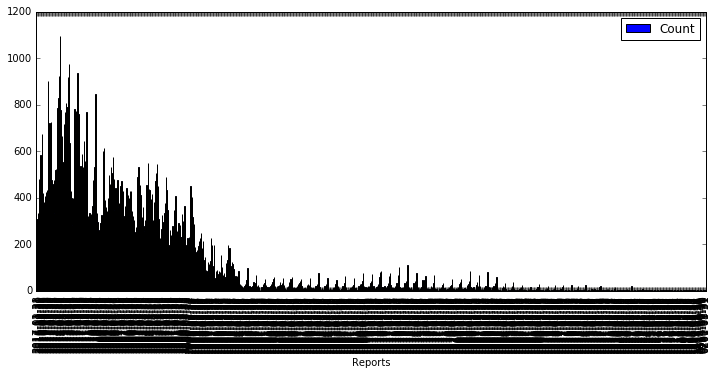

In [69]:
ufos_df.plot(kind='bar', x='Reports', y='Count', figsize=(12, 5))

This chart doesn't look good because there are too many observations. Check how many observations there are by querying the `ufo_sightings` table:

In [70]:
print sqlContext.sql("select count(*) from ufo_sightings").collect()

[Row(count(1)=903)]


<a id="vizagg"></a>
### 12.2 Aggregate the data

To reduce the number of data points on the chart, you can aggregate the data by year. Here are a few of the ways that you can do that:

 - Run an SQL query on the Reports column to output the year, and then run a group by operation on the year.
 - Create a simple Python function to aggregate by year, and then run the function in an SQL query.
 - Run the `map()` method on the Spark Dataframe to append a new column that contains the aggregated count by year. This is the method you'll use.

Remember that the dates in the Reports column look like this: 2016-01-31. Therefore, to create the year column, you just need the first 4 characters from the Reports column.

Add a year column to the DataFrame:

In [71]:
ufos_df = spark_df.rdd.map(lambda x: Row(**dict(x.asDict(), year=int(x.Reports[0:4])))).toDF()

Check to verify that you get the expected results:

In [72]:
print ufos_df.take(5)

[Row(Count=201.0, Reports=u'2017-02-28', year=2017), Row(Count=307.0, Reports=u'2017-01-31', year=2017), Row(Count=333.0, Reports=u'2016-12-31', year=2016), Row(Count=480.0, Reports=u'2016-11-30', year=2016), Row(Count=473.0, Reports=u'2016-10-31', year=2016)]


Register the DataFrame as a table:

In [73]:
ufos_df.registerTempTable("ufo_withyear")

<a id="vizchart2"></a>
### 12.3 Create a better chart

Now run an SQL query to group by year, order by year, and filter to the last 66 years. Then create a pandas DataFrame for the results and create a chart of the number of reports by year.

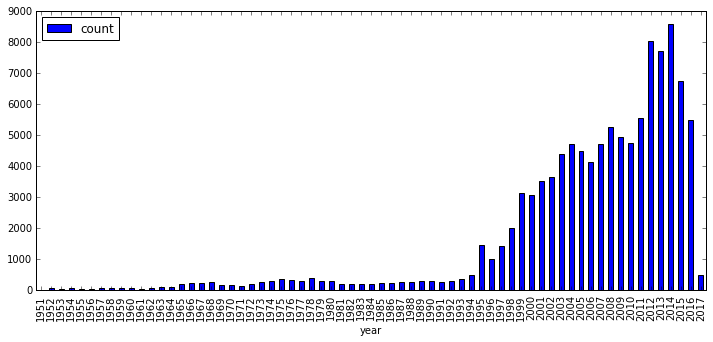

In [74]:
query = """
select 
    sum(Count) as count, 
    year 
from ufo_withyear
where year > 1950
group by year
order by year
"""
pandas_ufos_withyears = sqlContext.sql(query).toPandas()
pandas_ufos_withyears.plot(kind='bar', x='year', y='count', figsize=(12, 5))

Now you have a chart that you can read. Look back at the original chart and notice that it wasn't ordered ascending by year.

<a id="nextsteps"></a>
## 13. Summary and next steps
You've learned how to work with data in RDDs, create DataFrames, convert between DataFrame types, and convert from RDDs. You know how to run SQL queries and create SQL functions. And you can visualize the data in charts. 

Dig deeper:
 - [Apache Spark documentation](http://spark.apache.org/documentation.html)
 - [PySpark documentation](http://spark.apache.org/docs/latest/api/python/pyspark.html)
 - [pandas](http://pandas.pydata.org/pandas-docs/stable/index.html)
 - [matplotlib](http://matplotlib.org/)
 - [NumPy](http://www.numpy.org/)

### Author
Carlo Appugliese is a Spark and Hadoop evangelist at IBM.